In [1]:
import pandas as pd
from rdkit import rdBase, Chem, DataStructs
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem.AtomPairs import Pairs, Torsions
from rdkit.Chem.Draw import SimilarityMaps
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
def morgan_index1_index2(index1 = 'morgan_index', index2 = 'troa_morgan_index',input=input):
    mat = np.zeros((len(index1), len(index2)))
    data_stati = []
    for i in range(len(index1)):
        for j in range(len(index2)):
            m1 = index1[i][1]
            m2 = index2[j][1]
            mat[i][j]=DataStructs.DiceSimilarity(m1,m2)
            data_stati.append(mat[i][j])
            if mat[i][j]>input:
                print([i,j,DataStructs.DiceSimilarity(m1,m2)])
            else:
                continue
    return mat

In [3]:
smilesinput = pd.read_csv('./pdb_ligand_smiles.csv')
morgan_index = []
for index,row in smilesinput.iterrows():
    m = Chem.MolFromSmiles(row['smiles'])
    fp = AllChem.GetMorganFingerprint(m,2)
    morgan_index.append([m,fp])

In [4]:
troa_morgan_index = []
troazple_m = Chem.SDMolSupplier('./triazoles_all.sdf')
for i in range(len(troazple_m)):
    fp_troa = AllChem.GetMorganFingerprint(troazple_m[i],2)
    troa_morgan_index.append([troazple_m[i],fp_troa])

In [6]:
morgan_index1_index2(morgan_index,troa_morgan_index,0.7)

[348, 579, 0.7079646017699115]
[354, 918, 0.768]
[403, 2666, 0.7252747252747253]
[838, 2977, 0.725]


array([[0.13684211, 0.11578947, 0.11578947, ..., 0.03225806, 0.11702128,
        0.1025641 ],
       [0.13684211, 0.11578947, 0.11578947, ..., 0.03225806, 0.11702128,
        0.1025641 ],
       [0.10227273, 0.07954545, 0.07954545, ..., 0.03488372, 0.11494253,
        0.06629834],
       ...,
       [0.256     , 0.304     , 0.304     , ..., 0.19834711, 0.29268293,
        0.33846154],
       [0.31007752, 0.24806202, 0.24806202, ..., 0.176     , 0.23622047,
        0.2238806 ],
       [0.22352941, 0.18823529, 0.18823529, ..., 0.14457831, 0.21428571,
        0.16      ]])

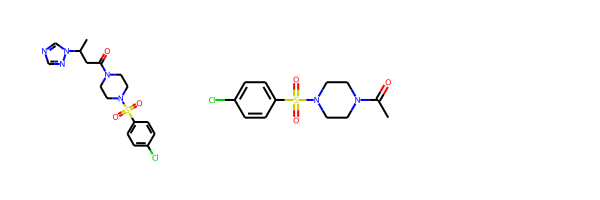

In [22]:
mols = []
m_act = troa_morgan_index[918][0]
m_sam = morgan_index[354][0]
mols.append(m_act)
mols.append(m_sam)
Draw.MolsToGridImage(
    mols,
    subImgSize=(200,200),
    legends=['' for x in mols]
)
